Importo i testi e le sources

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\enduser\\OneDrive - Politecnico di Milano\\Ingegneria matematica\\Tesi\\ProveDiCodice\\Modelli\\InfoGraphFebbraio_Marzo\\unsupervised\\CodiciMiei'

In [3]:
import json
import os
from tqdm.notebook import tqdm

# Definisci la cartella contenente i file
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer3"

# Lista dei testi estratti
lista_source3 = []
lista_testi3 = []

# Itera su tutti i file nella cartella
for filename in tqdm(os.listdir(cartella)):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                if "source" in data:
                    source = data["source"]
                    lista_source3.append(source)
                if "text" in data:
                    testo = data["text"]
                    lista_testi3.append(testo)
            except Exception as e:
                pass

  0%|          | 0/10213 [00:00<?, ?it/s]

In [4]:
'''
Codice non ottimizzato, vedi quello sotto!
lista_source_unique3 = sorted(list(set(lista_source3))) # 13 source diverse
print(lista_source_unique3)
occorrenze = {}

for parola in lista_source3:
    occorrenze[parola] = occorrenze.get(parola,0)+1
print(occorrenze,'\n')

somma = {}

for i,parola in enumerate(lista_source3):
    somma[parola] = somma.get(parola,0)+len((lista_testi3[i]))
    
print(somma,"\n")

media = {}
for parola in somma:
    media[parola] = somma[parola]/occorrenze[parola]
print(media)
'''

'\nCodice non ottimizzato, vedi quello sotto!\nlista_source_unique3 = sorted(list(set(lista_source3))) # 13 source diverse\nprint(lista_source_unique3)\noccorrenze = {}\n\nfor parola in lista_source3:\n    occorrenze[parola] = occorrenze.get(parola,0)+1\nprint(occorrenze,\'\n\')\n\nsomma = {}\n\nfor i,parola in enumerate(lista_source3):\n    somma[parola] = somma.get(parola,0)+len((lista_testi3[i]))\n    \nprint(somma,"\n")\n\nmedia = {}\nfor parola in somma:\n    media[parola] = somma[parola]/occorrenze[parola]\nprint(media)\n'

In [5]:
lista_source_unique3 = sorted(list(set(lista_source3))) # 13 source diverse
print(lista_source_unique3,'\n')
occorrenze = {}

for parola in lista_source3:
    occorrenze[parola] = occorrenze.get(parola,0)+1
print(occorrenze)


['Agenzia Italiana del Farmaco', 'Clinical Management Issues', 'GCND Giornale di Clinica Nefrologica e Dialisi', 'Hematology Reports', 'Italian Journal of Emergency Medicine', 'Italian Journal of Medicine', 'La Pediatria Medica e Chirurgica', 'Miur', 'Pediatric Reports (MDPI)', 'Pediatric Reports (PAGEPress)', 'Prof. Dr. Francescopaolo Mattioli', 'Sapienza Università di Roma', 'microbiologia medica'] 

{'GCND Giornale di Clinica Nefrologica e Dialisi': 10, 'Miur': 1439, 'Clinical Management Issues': 1, 'Hematology Reports': 6, 'Italian Journal of Medicine': 534, 'Italian Journal of Emergency Medicine': 4, 'Sapienza Università di Roma': 89, 'microbiologia medica': 17, 'La Pediatria Medica e Chirurgica': 6, 'Pediatric Reports (PAGEPress)': 8, 'Pediatric Reports (MDPI)': 6, 'Prof. Dr. Francescopaolo Mattioli': 9, 'Agenzia Italiana del Farmaco': 8084}


In [6]:
import statistics

# Calcolo della media, deviazione standard e varianza
media = {}
deviazione_standard = {}
varianza = {}
somma = {}
maxx = {}
minn = {}

for i,parola in enumerate(lista_source3):
    somma[parola] = somma.get(parola,0)+len((lista_testi3[i]))

for parola in somma:
    lunghezze_parole = [len(lista_testi3[i]) for i, word in enumerate(lista_source3) if word == parola]
    # questo è il core di tutto il codice (fa una lista delle lunghezze di tutti i documenti con la stessa source!)
    #print(lunghezze_parole)
    if len(lunghezze_parole) < 2:
        # Se c'è solo un dato, trattalo come deviazione standard zero e varianza zero
        deviazione_standard[parola] = 0
        varianza[parola] = 0
    else:
        deviazione_standard[parola] = statistics.stdev(lunghezze_parole)
        varianza[parola] = statistics.variance(lunghezze_parole)
    media[parola] = statistics.mean(lunghezze_parole)
    minn[parola] = min(lunghezze_parole)
    maxx[parola] = max(lunghezze_parole)
    #print(deviazione_standard)
    #print(media)
    #print(minn)
    #print(maxx)

In [7]:
print(media,'\n')
print(deviazione_standard,'\n')
print(minn,'\n')
print(maxx,'\n')



{'GCND Giornale di Clinica Nefrologica e Dialisi': 4698.4, 'Miur': 230.39402362751912, 'Clinical Management Issues': 4463, 'Hematology Reports': 1143.8333333333333, 'Italian Journal of Medicine': 1170.9681647940074, 'Italian Journal of Emergency Medicine': 2760.25, 'Sapienza Università di Roma': 598.5842696629213, 'microbiologia medica': 1405.7058823529412, 'La Pediatria Medica e Chirurgica': 3104.5, 'Pediatric Reports (PAGEPress)': 3465.375, 'Pediatric Reports (MDPI)': 3117.6666666666665, 'Prof. Dr. Francescopaolo Mattioli': 6055.111111111111, 'Agenzia Italiana del Farmaco': 10373.418975754577} 

{'GCND Giornale di Clinica Nefrologica e Dialisi': 1017.0565591177535, 'Miur': 129.3305260609893, 'Clinical Management Issues': 0, 'Hematology Reports': 328.59118470626487, 'Italian Journal of Medicine': 300.30341273046463, 'Italian Journal of Emergency Medicine': 2161.8913594350665, 'Sapienza Università di Roma': 235.66023351179882, 'microbiologia medica': 1129.1257549928773, 'La Pediatria M

In [8]:
# Definisci la cartella contenente i file
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer2"

# Lista dei testi estratti
lista_source2 = []
lista_testi2 = []

# Itera su tutti i file nella cartella
for filename in tqdm(os.listdir(cartella)):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                if "source" in data:
                    source = data["source"]
                    lista_source2.append(source)
                if "text" in data:
                    testo = data["text"]
                    lista_testi2.append(testo)
            except Exception as e:
                pass

  0%|          | 0/174 [00:00<?, ?it/s]

In [9]:
lista_source_unique2 = sorted(list(set(lista_source2))) # 13 source diverse
print(lista_source_unique2)
occorrenze = {}

for parola in lista_source2:
    occorrenze[parola] = occorrenze.get(parola,0)+1
print(occorrenze)

['AboutOpen', 'Clinical Management Issues', 'GCND Giornale di Clinica Nefrologica e Dialisi', 'Hematology Reports', 'Italian Journal of Emergency Medicine', 'Italian Journal of Medicine', 'La Pediatria Medica e Chirurgica', 'Miur', 'Pediatric Reports', 'Prof. Dr. Francescopaolo Mattioli', 'Sapienza Università di Roma', 'Working Paper of Public Health', 'microbiologia medica', 'pediatric reports']
{'AboutOpen': 2, 'GCND Giornale di Clinica Nefrologica e Dialisi': 10, 'Miur': 12, 'Clinical Management Issues': 7, 'Hematology Reports': 1, 'Italian Journal of Medicine': 70, 'Italian Journal of Emergency Medicine': 8, 'Sapienza Università di Roma': 15, 'microbiologia medica': 9, 'La Pediatria Medica e Chirurgica': 6, 'Pediatric Reports': 7, 'pediatric reports': 16, 'Working Paper of Public Health': 2, 'Prof. Dr. Francescopaolo Mattioli': 9}


In [10]:
media = {}
deviazione_standard = {}
varianza = {}
somma = {}
maxx = {}
minn = {}

for i,parola in enumerate(lista_source2):
    somma[parola] = somma.get(parola,0)+len((lista_testi2[i]))

for parola in somma:
    lunghezze_parole = [len(lista_testi2[i]) for i, word in enumerate(lista_source2) if word == parola]
    # questo è il core di tutto il codice (fa una lista delle lunghezze di tutti i documenti con la stessa source!)
    #print(lunghezze_parole)
    if len(lunghezze_parole) < 2:
        # Se c'è solo un dato, trattalo come deviazione standard zero e varianza zero
        deviazione_standard[parola] = 0
        varianza[parola] = 0
    else:
        deviazione_standard[parola] = statistics.stdev(lunghezze_parole)
        varianza[parola] = statistics.variance(lunghezze_parole)
    media[parola] = statistics.mean(lunghezze_parole)
    minn[parola] = min(lunghezze_parole)
    maxx[parola] = max(lunghezze_parole)
    #print(deviazione_standard)
    #print(media)

In [11]:
print(media,'\n')
print(deviazione_standard,'\n')
print(minn,'\n')
print(maxx,'\n')

{'AboutOpen': 3204.5, 'GCND Giornale di Clinica Nefrologica e Dialisi': 3384.3, 'Miur': 655.3333333333334, 'Clinical Management Issues': 3922.5714285714284, 'Hematology Reports': 2631, 'Italian Journal of Medicine': 1461.0714285714287, 'Italian Journal of Emergency Medicine': 2652.75, 'Sapienza Università di Roma': 657.7333333333333, 'microbiologia medica': 2654.3333333333335, 'La Pediatria Medica e Chirurgica': 2400.5, 'Pediatric Reports': 2439.1428571428573, 'pediatric reports': 3173.9375, 'Working Paper of Public Health': 2507, 'Prof. Dr. Francescopaolo Mattioli': 3671} 

{'AboutOpen': 767.2108575874041, 'GCND Giornale di Clinica Nefrologica e Dialisi': 803.9602049300147, 'Miur': 49.84399906131372, 'Clinical Management Issues': 519.6212906668526, 'Hematology Reports': 0, 'Italian Journal of Medicine': 742.3519873246694, 'Italian Journal of Emergency Medicine': 1087.8205931389343, 'Sapienza Università di Roma': 65.34793325693155, 'microbiologia medica': 933.2743433739084, 'La Pediatr

In [12]:
cartella = r"C:\Users\enduser\OneDrive - Politecnico di Milano\Ingegneria matematica\Tesi\ProveDiCodice\E3C-Corpus\data_collection\Italian\layer1"

# Lista dei testi estratti
lista_source1 = []
lista_testi1 = []
maxx = {}
minn = {}

# Itera su tutti i file nella cartella
for filename in tqdm(os.listdir(cartella)):
    if filename.endswith(".json"):  # Assicurati che siano file JSON
        filepath = os.path.join(cartella, filename)
        with open(filepath, 'r', encoding='utf-8') as file:  # Specifica l'encoding come utf-8
            try:
                # Carica il contenuto del file JSON
                data = json.load(file)
                if "source" in data:
                    source = data["source"]
                    lista_source1.append(source)
                if "text" in data:
                    testo = data["text"]
                    lista_testi1.append(testo)
            except Exception as e:
                pass

  0%|          | 0/86 [00:00<?, ?it/s]

In [13]:
lista_source_unique1 = sorted(list(set(lista_source1))) # 13 source diverse
print(lista_source_unique1)
occorrenze = {}

for parola in lista_source1:
    occorrenze[parola] = occorrenze.get(parola,0)+1
print(occorrenze)

['AboutOpen', 'Argomenti di Oncologia Geriatrica', 'Clinical Management Issues', 'GCND Giornale di Clinica Nefrologica e Dialisi', 'Italian Journal of Emergency Medicine', 'Italian Journal of Medicine', 'La Pediatria Medica e Chirurgica', 'Miur', 'Pediatric Reports (MDPI)', 'Pediatric Reports (PAGEPress)', 'Prof. Dr. Francescopaolo Mattioli', 'Sapienza Università di Roma', 'microbiologia medica']
{'AboutOpen': 2, 'GCND Giornale di Clinica Nefrologica e Dialisi': 2, 'Argomenti di Oncologia Geriatrica': 1, 'Miur': 4, 'Clinical Management Issues': 5, 'Italian Journal of Medicine': 33, 'Italian Journal of Emergency Medicine': 3, 'Sapienza Università di Roma': 11, 'microbiologia medica': 1, 'La Pediatria Medica e Chirurgica': 7, 'Pediatric Reports (PAGEPress)': 8, 'Pediatric Reports (MDPI)': 6, 'Prof. Dr. Francescopaolo Mattioli': 3}


In [14]:
media = {}
deviazione_standard = {}
varianza = {}
somma = {}
minn = {}
maxx = {}

for i,parola in enumerate(lista_source1):
    somma[parola] = somma.get(parola,0)+len((lista_testi1[i]))

for parola in somma:
    lunghezze_parole = [len(lista_testi1[i]) for i, word in enumerate(lista_source1) if word == parola]
    # questo è il core di tutto il codice (fa una lista delle lunghezze di tutti i documenti con la stessa source!)
    #print(lunghezze_parole)
    if len(lunghezze_parole) < 2:
        # Se c'è solo un dato, trattalo come deviazione standard zero e varianza zero
        deviazione_standard[parola] = 0
        varianza[parola] = 0
    else:
        deviazione_standard[parola] = statistics.stdev(lunghezze_parole)
        varianza[parola] = statistics.variance(lunghezze_parole)
    media[parola] = statistics.mean(lunghezze_parole)
    minn[parola] = min(lunghezze_parole)
    maxx[parola] = max(lunghezze_parole)
    #print(deviazione_standard)
    #print(media)

In [15]:
print(media,'\n')
print(deviazione_standard,'\n')
print(minn,'\n')
print(maxx,'\n')

{'AboutOpen': 3267, 'GCND Giornale di Clinica Nefrologica e Dialisi': 3116, 'Argomenti di Oncologia Geriatrica': 3829, 'Miur': 623.5, 'Clinical Management Issues': 3673.2, 'Italian Journal of Medicine': 1468.3030303030303, 'Italian Journal of Emergency Medicine': 2923.3333333333335, 'Sapienza Università di Roma': 668, 'microbiologia medica': 1716, 'La Pediatria Medica e Chirurgica': 2466.8571428571427, 'Pediatric Reports (PAGEPress)': 2716.875, 'Pediatric Reports (MDPI)': 3127.8333333333335, 'Prof. Dr. Francescopaolo Mattioli': 3177} 

{'AboutOpen': 619.4255403194156, 'GCND Giornale di Clinica Nefrologica e Dialisi': 384.66608896548183, 'Argomenti di Oncologia Geriatrica': 0, 'Miur': 57.57603668193913, 'Clinical Management Issues': 351.77364881412024, 'Italian Journal of Medicine': 749.1253018040642, 'Italian Journal of Emergency Medicine': 1095.2946331162832, 'Sapienza Università di Roma': 45.19513248127502, 'microbiologia medica': 0, 'La Pediatria Medica e Chirurgica': 678.7143308175

# Correlazione source/lunghezza testi


layer1

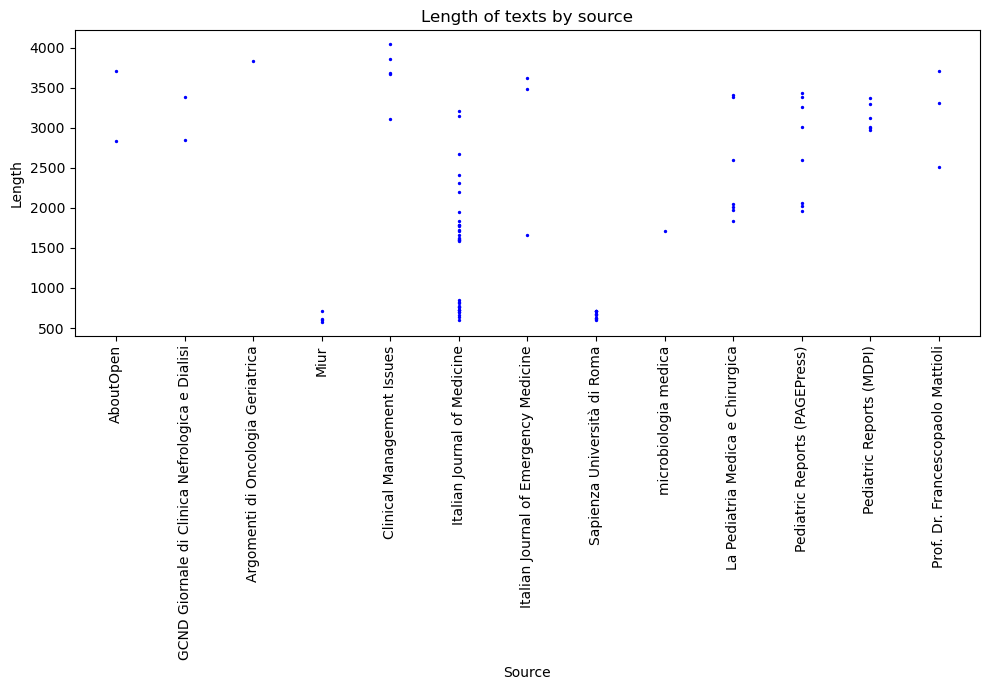

In [16]:
import statistics
import matplotlib.pyplot as plt

# Calcolo della media, deviazione standard e varianza
media = {}
somma = {}


for i,parola in enumerate(lista_source1):
    somma[parola] = somma.get(parola,0)+len((lista_testi1[i]))

for parola in somma:
    lunghezze_parole = [len(lista_testi1[i]) for i, word in enumerate(lista_source1) if word == parola]
    media[parola] = statistics.mean(lunghezze_parole)
    #print(lunghezze_parole)
    #print(parola)
    for lun in lunghezze_parole:
        plt.scatter(parola, lun, s=2, c = 'blue')
        

# Imposta le etichette sull'asse x
plt.xticks(rotation=90)  # Ruota le etichette per renderle leggibili
plt.xlabel('Source')
plt.ylabel('Length')
plt.title('Length of texts by source')

plt.gcf().set_size_inches(10, 7)  # Imposta le dimensioni della figura

plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette
plt.savefig('immagini/lunghezza_sources_layer1.svg')
plt.savefig('immagini\lunghezza_sources_layer1.eps')
plt.show()


Boxplot layer 1

In [50]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source1)))
df['Text'] = lista_testi1
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source1

In [51]:
df_prova = df.groupby("Source")["Length"].mean()
print(df_prova)

Source
AboutOpen                                         3267.000000
Argomenti di Oncologia Geriatrica                 3829.000000
Clinical Management Issues                        3673.200000
GCND Giornale di Clinica Nefrologica e Dialisi    3116.000000
Italian Journal of Emergency Medicine             2923.333333
Italian Journal of Medicine                       1468.303030
La Pediatria Medica e Chirurgica                  2466.857143
Miur                                               623.500000
Pediatric Reports (MDPI)                          3127.833333
Pediatric Reports (PAGEPress)                     2716.875000
Prof. Dr. Francescopaolo Mattioli                 3177.000000
Sapienza Università di Roma                        668.000000
microbiologia medica                              1716.000000
Name: Length, dtype: float64


In [52]:
rank_discip = df.groupby("Source")["Length"].mean().sort_values(ascending=False).index
rank_discip

Index(['Argomenti di Oncologia Geriatrica', 'Clinical Management Issues',
       'AboutOpen', 'Prof. Dr. Francescopaolo Mattioli',
       'Pediatric Reports (MDPI)',
       'GCND Giornale di Clinica Nefrologica e Dialisi',
       'Italian Journal of Emergency Medicine',
       'Pediatric Reports (PAGEPress)', 'La Pediatria Medica e Chirurgica',
       'microbiologia medica', 'Italian Journal of Medicine',
       'Sapienza Università di Roma', 'Miur'],
      dtype='object', name='Source')

In [53]:
new_labels = ['Argomenti di Oncologia Geriatrica', 'Clinical Management Issues', 'AboutOpen', 'Prof. Dr. Francescopaolo Mattioli',
              'Pediatric Reports (MDPI)', 'GCND Giornale di Clinica Nefrologica e Dialisi',
              'Italian Journal of Emergency Medicine', 'Pediatric Reports (PAGEPresse)',
              'La Pediatria Medica e Chirurgica', 'microbiologia medica',
              'Italian Journal of Medicine', 'Sapienza Università di Roma', 'Miur']

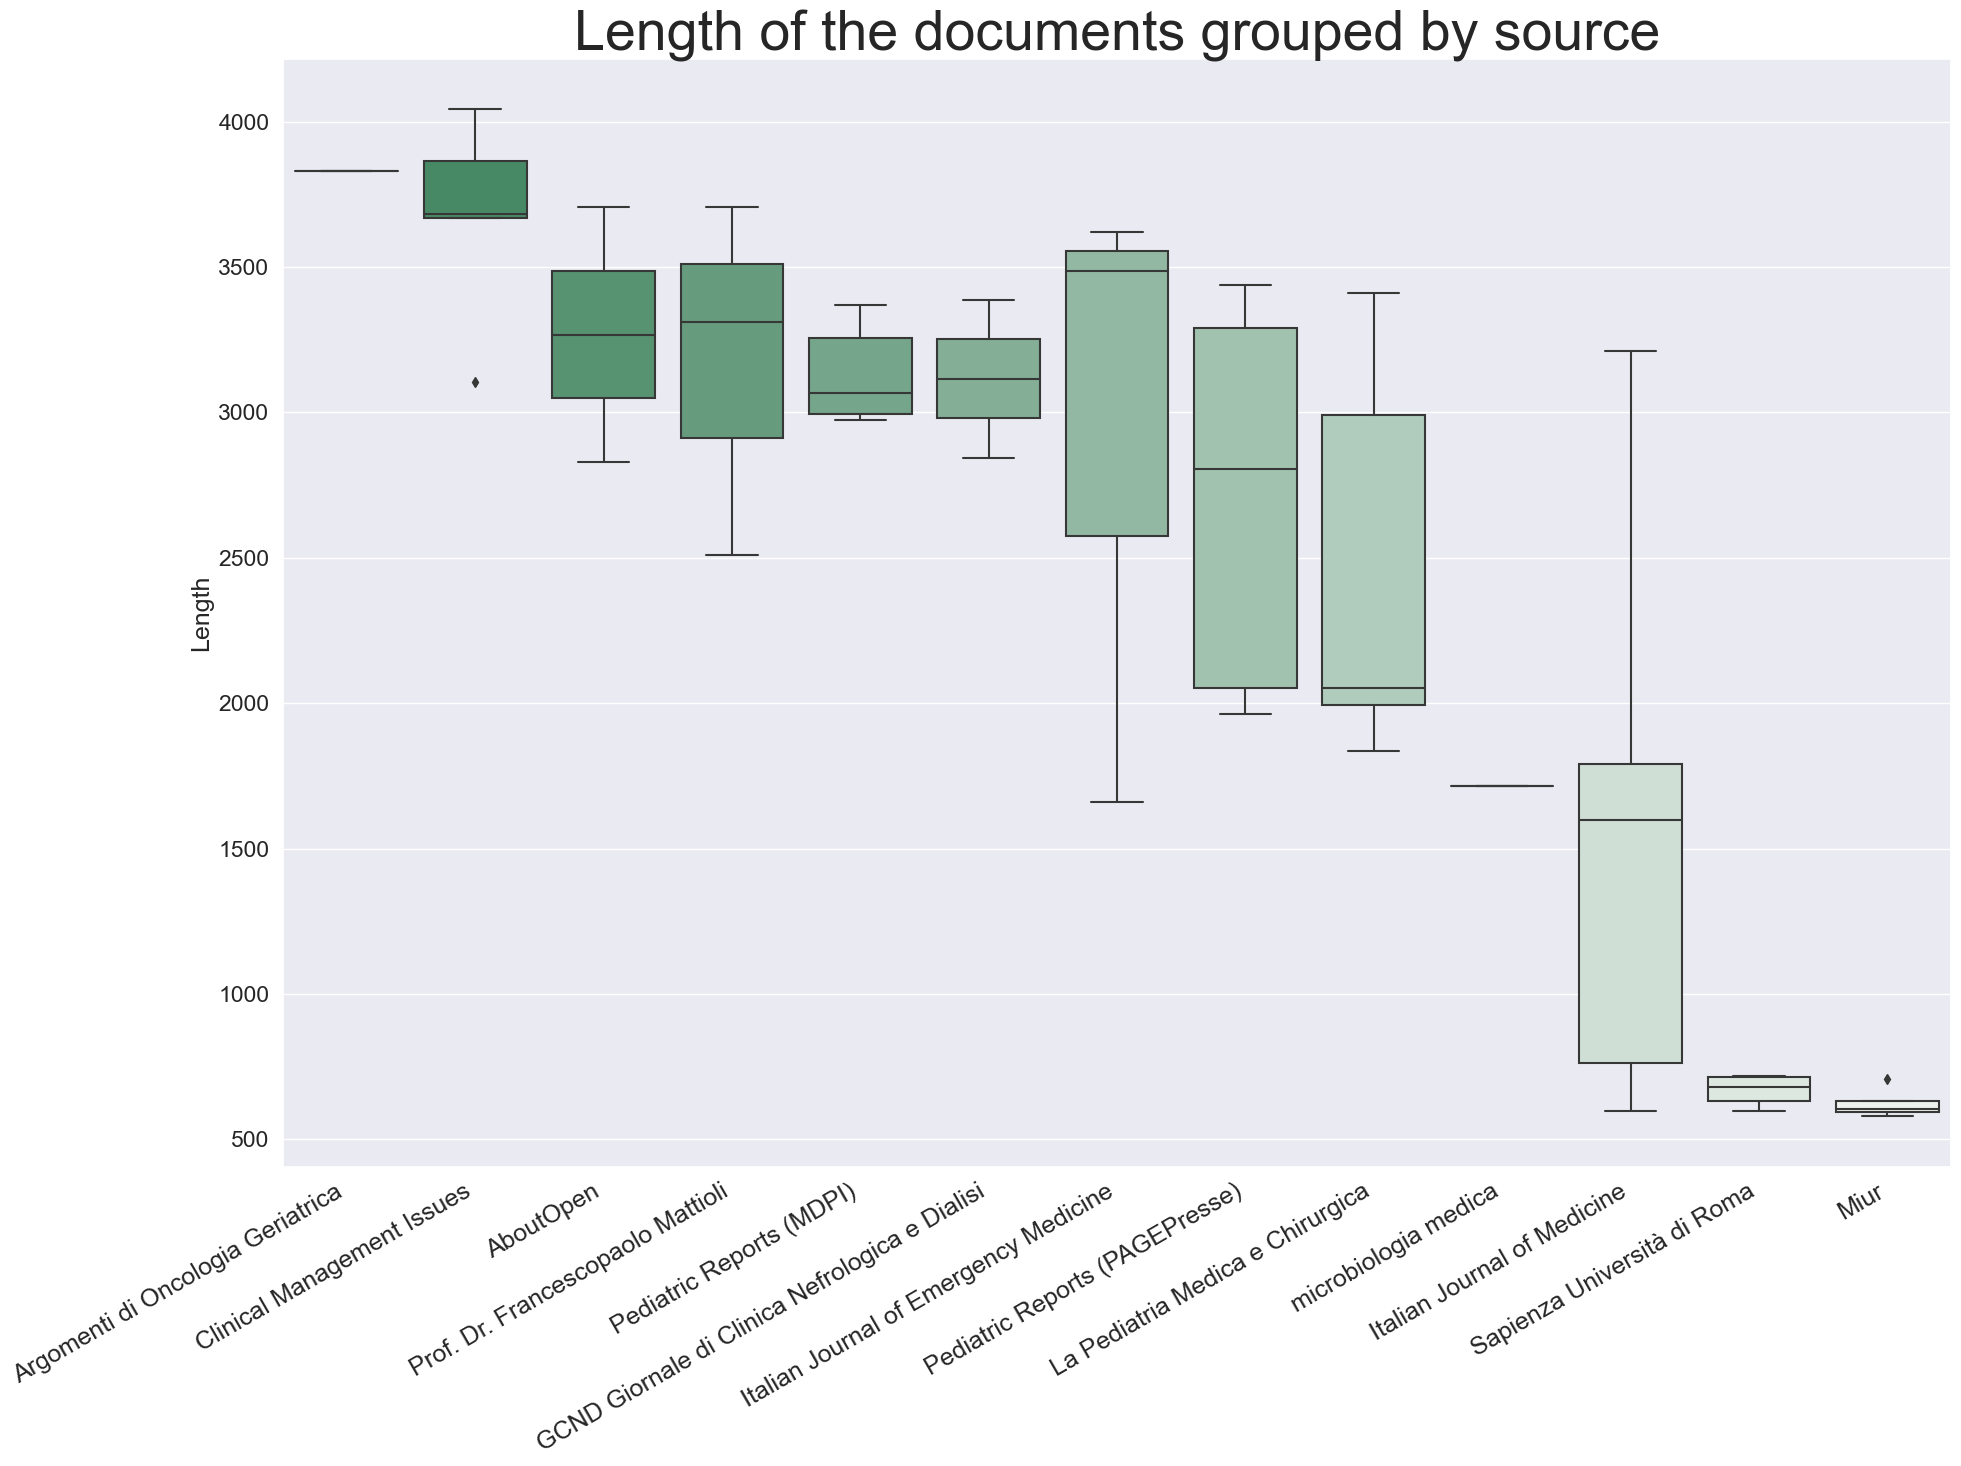

In [54]:
rank_discip = df.groupby("Source")["Length"].mean().sort_values(ascending=False).index
sns.set(rc={'figure.figsize':(50,20)}, font_scale=1.5)
palette = sns.color_palette("light:seagreen", n_colors=df['Source'].nunique())
palette.reverse()
g = sns.boxplot(y="Length", x='Source',
            data=df, order=rank_discip,palette=palette)
g.set(xlabel='')
g.axes.set_title("Length of the documents grouped by source",fontsize=40)
g.set_xticklabels(new_labels,rotation = 30, size=18, ha='right')

plt.gcf().set_size_inches(20, 15)  # Imposta le dimensioni della figura
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette

plt.savefig('immagini\Boxplot_lunghezze_ayer1.eps')
plt.show()

Boxplot layer 2

In [55]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source2)))
df['Text'] = lista_testi2
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source2

In [56]:
df

,Index,Text,Length,Source
0,0,"La signora Luisa ha 51 anni, è affetta da artr...",3747,AboutOpen
1,1,Tiziana è una donna di 61 anni e vive in un pi...,2662,AboutOpen
2,2,"Una paziente di 61 anni, giunta all'uremia ter...",4057,GCND Giornale di Clinica Nefrologica e Dialisi
3,3,Una donna di 70 anni con insufficienza renale ...,3581,GCND Giornale di Clinica Nefrologica e Dialisi
4,4,Descriviamo il decorso delle alterazioni del m...,3712,GCND Giornale di Clinica Nefrologica e Dialisi
...,...,...,...,...
169,169,Donna - 21\n\nAnamnesi familiare: negativa\n\n...,3495,Prof. Dr. Francescopaolo Mattioli
170,170,Uomo - anni 50\n\nAnamnesi Patologica Remota\n...,3864,Prof. Dr. Francescopaolo Mattioli
171,171,maschio – aa. 66\nAnamnesi patologica remota: ...,3877,Prof. Dr. Francescopaolo Mattioli
172,172,Uomo - aa 78\n\nAnamnesi Patologica Remota\nAp...,3948,Prof. Dr. Francescopaolo Mattioli


In [57]:
rank_discip = df.groupby("Source")["Length"].mean().sort_values(ascending=False).index
rank_discip

Index(['Clinical Management Issues', 'Prof. Dr. Francescopaolo Mattioli',
       'GCND Giornale di Clinica Nefrologica e Dialisi', 'AboutOpen',
       'pediatric reports', 'microbiologia medica',
       'Italian Journal of Emergency Medicine', 'Hematology Reports',
       'Working Paper of Public Health', 'Pediatric Reports',
       'La Pediatria Medica e Chirurgica', 'Italian Journal of Medicine',
       'Sapienza Università di Roma', 'Miur'],
      dtype='object', name='Source')

In [58]:
new_labels = ['Clinical Management Issues', 'Prof. Dr. Francescopaolo Mattioli',
       'GCND Giornale di Clinica Nefrologica e Dialisi', 'AboutOpen',
       'pediatric reports', 'microbiologia medica',
       'Italian Journal of Emergency Medicine', 'Hematology Reports',
       'Working Paper of Public Health', 'Pediatric Reports',
       'La Pediatria Medica e Chirurgica', 'Italian Journal of Medicine',
       'Sapienza Università di Roma', 'Miur']

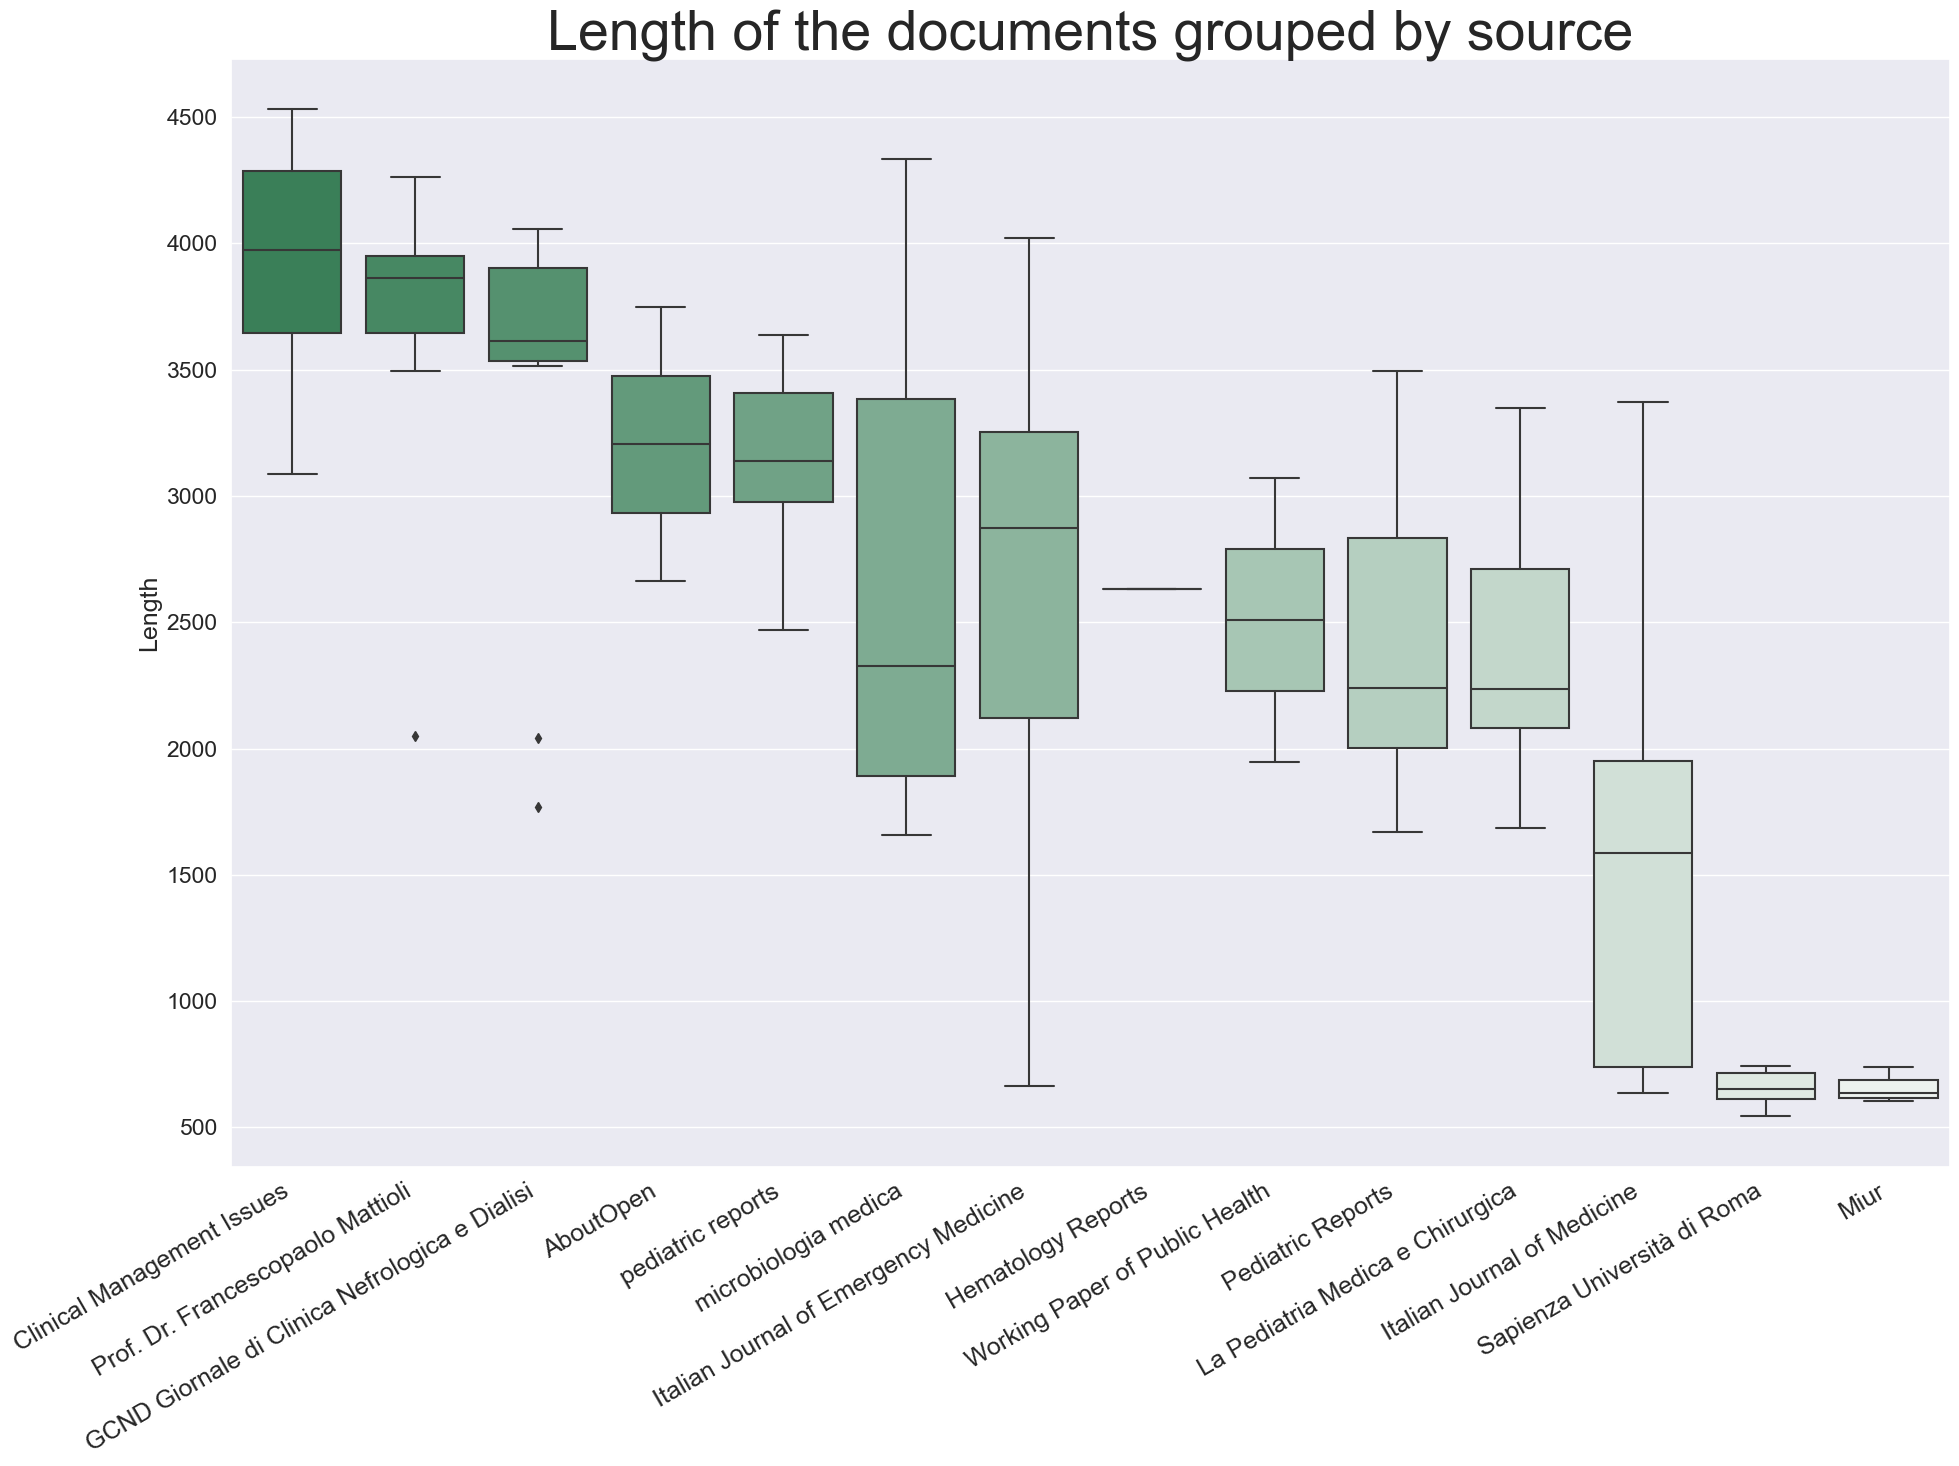

In [59]:
rank_discip = df.groupby("Source")["Length"].mean().sort_values(ascending=False).index
sns.set(rc={'figure.figsize':(50,20)}, font_scale=1.5)
palette = sns.color_palette("light:seagreen", n_colors=df['Source'].nunique())
palette.reverse()
g = sns.boxplot(y="Length", x='Source',
            data=df, order=rank_discip,palette=palette)
g.set(xlabel='')
g.axes.set_title("Length of the documents grouped by source",fontsize=40)
g.set_xticklabels(new_labels,rotation = 30, size=18, ha='right')

plt.gcf().set_size_inches(20, 15)  # Imposta le dimensioni della figura
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette

plt.savefig('immagini\Boxplot_lunghezze_ayer2.eps')
plt.show()

Boxplot layer 3

In [60]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(columns = ['Index','Text','Length', 'Source'])
df['Index'] = list(range(len(lista_source3)))
df['Text'] = lista_testi3
df['Length'] = [len(text) for text in df['Text']]
df['Source'] = lista_source3

In [61]:
df

,Index,Text,Length,Source
0,0,C.C. iniziava a fare dialisi all’età di 17 ann...,4372,GCND Giornale di Clinica Nefrologica e Dialisi
1,1,I.Z. è un giovane di 22 anni. Pochi giorni pri...,6579,GCND Giornale di Clinica Nefrologica e Dialisi
2,2,Nel giugno 2007 presso la Struttura Complessa ...,4478,GCND Giornale di Clinica Nefrologica e Dialisi
3,3,Donna di 75 anni affetta da diabete mellito di...,2745,GCND Giornale di Clinica Nefrologica e Dialisi
4,4,Nel settembre del 2008 giunge alla nostra osse...,5750,GCND Giornale di Clinica Nefrologica e Dialisi
...,...,...,...,...
10208,10208,Confezioni \r\n Zytiga 250 mg 120 compresse\nC...,10410,Agenzia Italiana del Farmaco
10209,10209,Confezioni \r\n Zytiga 500 mg 56 compresse riv...,10500,Agenzia Italiana del Farmaco
10210,10210,Confezioni \r\n Zyvoxid 600 mg 10 compresse ri...,20626,Agenzia Italiana del Farmaco
10211,10211,Confezioni \r\n Zyvoxid 1 flacone di granulato...,20941,Agenzia Italiana del Farmaco


In [62]:
rank_discip = df.groupby("Source")["Length"].mean().sort_values(ascending=False).index
rank_discip

Index(['Agenzia Italiana del Farmaco', 'Prof. Dr. Francescopaolo Mattioli',
       'GCND Giornale di Clinica Nefrologica e Dialisi',
       'Clinical Management Issues', 'Pediatric Reports (PAGEPress)',
       'Pediatric Reports (MDPI)', 'La Pediatria Medica e Chirurgica',
       'Italian Journal of Emergency Medicine', 'microbiologia medica',
       'Italian Journal of Medicine', 'Hematology Reports',
       'Sapienza Università di Roma', 'Miur'],
      dtype='object', name='Source')

In [63]:
new_labels = ['Agenzia Italiana del Farmaco', 'Prof. Dr. Francescopaolo Mattioli',
       'GCND Giornale di Clinica Nefrologica e Dialisi',
       'Clinical Management Issues', 'Pediatric Reports (PAGEPress)',
       'Pediatric Reports (MDPI)', 'La Pediatria Medica e Chirurgica',
       'Italian Journal of Emergency Medicine', 'microbiologia medica',
       'Italian Journal of Medicine', 'Hematology Reports',
       'Sapienza Università di Roma', 'Miur']

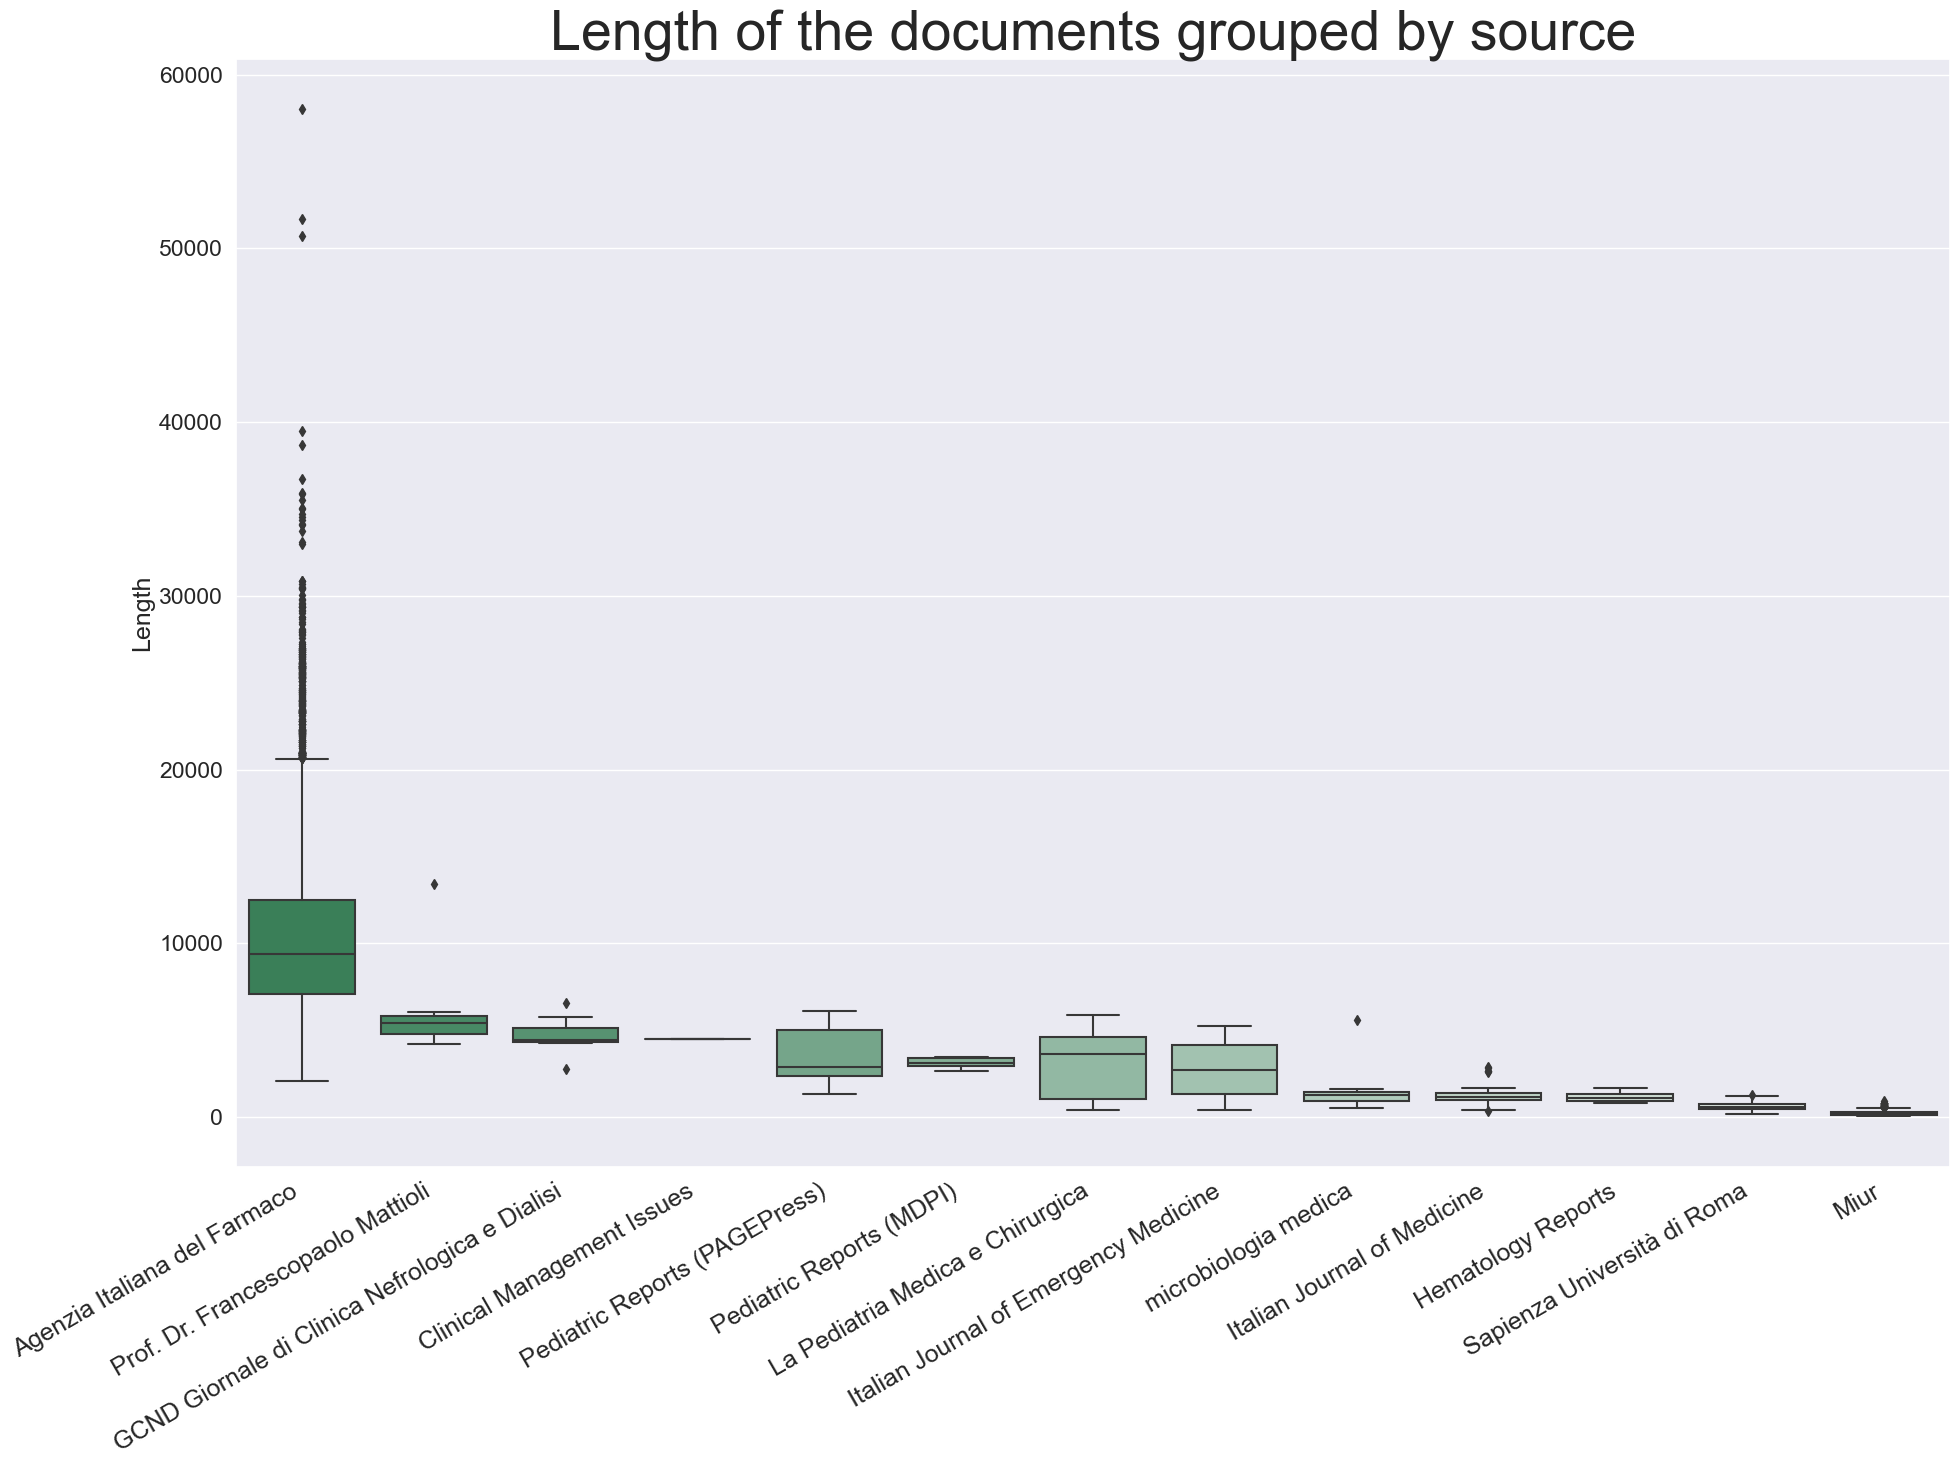

In [64]:
rank_discip = df.groupby("Source")["Length"].mean().sort_values(ascending=False).index
sns.set(rc={'figure.figsize':(50,20)}, font_scale=1.5)
palette = sns.color_palette("light:seagreen", n_colors=df['Source'].nunique())
palette.reverse()
g = sns.boxplot(y="Length", x='Source',
            data=df, order=rank_discip,palette=palette)
g.set(xlabel='')
g.axes.set_title("Length of the documents grouped by source",fontsize=40)
g.set_xticklabels(new_labels,rotation = 30, size=18, ha='right')

plt.gcf().set_size_inches(20, 15)  # Imposta le dimensioni della figura
plt.tight_layout()  # Regola il layout per evitare il taglio delle etichette

plt.savefig('immagini\Boxplot_lunghezze_ayer3.eps')
plt.show()

Stesso codice di prima ma togliendo agenzia del farmaco!

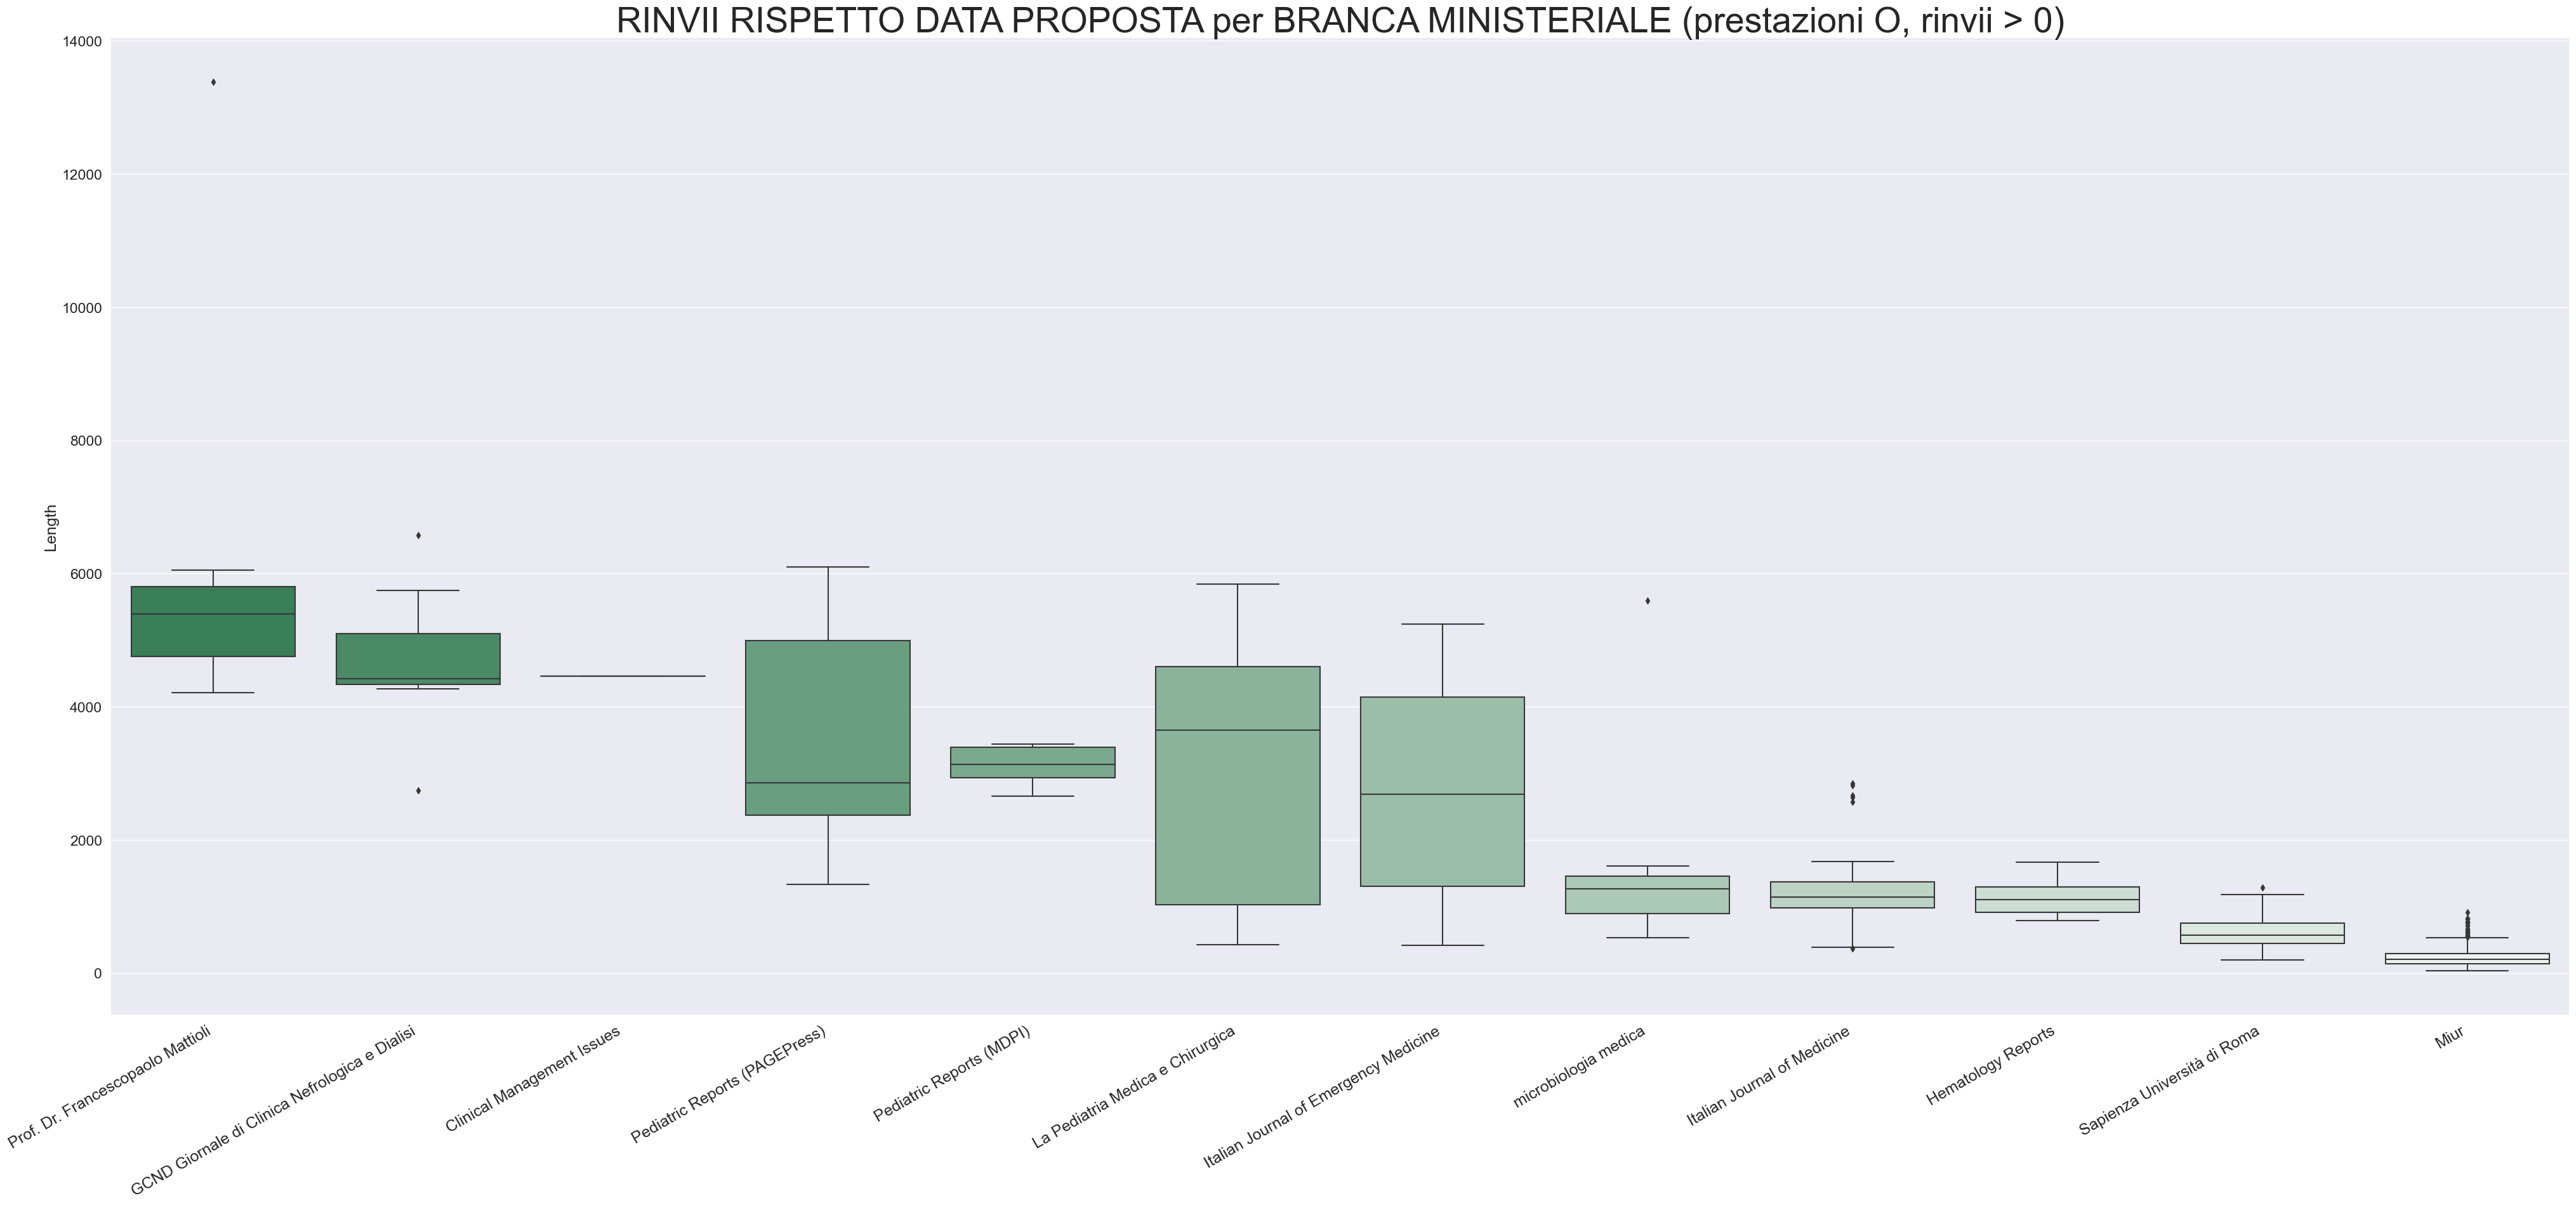

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Exclude the first source from the DataFrame
df_filtered = df[df['Source'] != rank_discip[0]]

# Re-calculate rank_discip after filtering out the first source
rank_discip = df_filtered.groupby("Source")["Length"].mean().sort_values(ascending=False).index

# Set up the plot
sns.set(rc={'figure.figsize':(50,20)}, font_scale=1.5)
palette = sns.color_palette("light:seagreen", n_colors=df_filtered['Source'].nunique())
palette.reverse()

# Plot the boxplot
g = sns.boxplot(y="Length", x='Source', data=df_filtered, order=rank_discip, palette=palette)
g.set(xlabel='')
g.axes.set_title("RINVII RISPETTO DATA PROPOSTA per BRANCA MINISTERIALE (prestazioni O, rinvii > 0)",fontsize=40)
g.set_xticklabels(g.get_xticklabels(), rotation=30, size=18, ha='right')

# Show the plot
#plt.savefig('immagini\Boxplot_lunghezze_ayer3.eps')
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Creazione di una lista di lunghezze dei testi
lunghezze_testi = [len(testo) for testo in lista_testi1]

# Calcolo del coefficiente di correlazione di Spearman
correlation, p_value = spearmanr(lista_source1, lunghezze_testi)

print("Coefficienti di correlazione di Spearman:", correlation)
print("P-value:", p_value)


layer2

In [ ]:
# Calcolo della media, deviazione standard e varianza
media = {}
somma = {}


for i,parola in enumerate(lista_source2):
    somma[parola] = somma.get(parola,0)+len((lista_testi2[i]))

for parola in somma:
    lunghezze_parole = [len(lista_testi2[i]) for i, word in enumerate(lista_source2) if word == parola]
    media[parola] = statistics.mean(lunghezze_parole)
    #print(lunghezze_parole)
    #print(parola)
    for lun in lunghezze_parole:
        plt.scatter(parola, lun, s=2, c = 'blue')
        

# Imposta le etichette sull'asse x
plt.xticks(rotation=90)  # Ruota le etichette per renderle leggibili
plt.xlabel('Source')
plt.ylabel('Length')
plt.title('Length of texts by source')
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Creazione di una lista di lunghezze dei testi
lunghezze_testi = [len(testo) for testo in lista_testi2]

# Calcolo del coefficiente di correlazione di Spearman
correlation, p_value = spearmanr(lista_source2, lunghezze_testi)

print("Coefficienti di correlazione di Spearman:", correlation)
print("P-value:", p_value)


layer3

In [ ]:
# Calcolo della media, deviazione standard e varianza
media = {}
somma = {}


for i,parola in enumerate(lista_source3):
    somma[parola] = somma.get(parola,0)+len((lista_testi3[i]))

for parola in tqdm(somma):
    lunghezze_parole = [len(lista_testi3[i]) for i, word in enumerate(lista_source3) if word == parola]
    media[parola] = statistics.mean(lunghezze_parole)
    #print(lunghezze_parole)
    #print(parola)
    for lun in tqdm(lunghezze_parole):
        plt.scatter(parola, lun, s=2, c = 'blue')
        

# Imposta le etichette sull'asse x
plt.xticks(rotation=90)  # Ruota le etichette per renderle leggibili
plt.xlabel('Source')
plt.ylabel('Length')
plt.title('Length of texts by source')
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Creazione di una lista di lunghezze dei testi
lunghezze_testi = [len(testo) for testo in lista_testi3]

# Calcolo del coefficiente di correlazione di Spearman
correlation, p_value = spearmanr(lista_source3, lunghezze_testi)

print("Coefficienti di correlazione di Spearman:", correlation)
print("P-value:", p_value)
